# ETH Trade 

This program gives me an update on a trade I made on 1/5/2021.  I sold .2BTC for 6.25ETH with a short term CapGains Tax of approximately 937.67 for the trade.  I am able to track the progress of my trade by updating a python list with the necessary info using pickle.  There is also some TA of BTC v. ETH at the bottom.  

In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from datetime import datetime

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
api_key=''
parameters = {
  'start':'1',
  'limit':'5000',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': api_key,
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

df=pd.DataFrame(data['data'])
dfbtc=df.loc[(df['name']=='Bitcoin')]
dfeth=df.loc[(df['name']=='Ethereum')]
BTC_price=dfbtc.quote.values[-1]['USD']['price']
BTC=.80203958
ETH_price=dfeth.quote.values[-1]['USD']['price']
ETH=6.24793706
Portfolio=(BTC_price*BTC)+(ETH_price*ETH)
print('The current price of BTC is $'+str(round(BTC_price,3)))
print('The current price of ETH is $'+str(round(ETH_price,3)))
print('Your current portfolio is worth $'+str(round(Portfolio,3))+'\n')
NOW=datetime.now().strftime("%Y-%m-%d %H:%M:%S")
portfolio = NOW,BTC_price,ETH_price,Portfolio

import pickle
import os

filename = 'portfolio.dat'

price = []

# first time you run this, "high_scores.dat" won't exist
#   so we need to check for its existence before we load 
#   our "database"
if os.path.exists(filename):
    # "with" statements are very handy for opening files. 
    with open(filename,'rb') as rfp: 
        price = pickle.load(rfp)
    # Notice that there's no "rfp.close()"
    #   ... the "with" clause calls close() automatically! 

price.append(portfolio)

# Now we "sync" our database
with open(filename,'wb') as wfp:
    pickle.dump(price, wfp)

# Re-load our database
with open(filename,'rb') as rfp:
    price = pickle.load(rfp)

df=pd.DataFrame(price,columns=['Date','BTC_Price','ETH_Price','Portfolio'])
tax_estimate=937.64
df['ETH/BTC']=df.ETH_Price/df.BTC_Price
df['.8BTC_6.25ETH_Trade']=(df['Portfolio']-df['BTC_Price'])-tax_estimate
df.tail(10)

The current price of BTC is $33600.579
The current price of ETH is $1381.777
Your current portfolio is worth $35582.248



,Date,BTC_Price,ETH_Price,Portfolio,ETH/BTC,.8BTC_6.25ETH_Trade
73,2021-01-21 23:56:36,30883.601324,1157.931624,32004.554540,0.037493,183.313216
74,2021-01-22 09:47:07,32361.579512,1225.639249,33612.984526,0.037873,313.765013
75,2021-01-22 09:49:27,32405.746095,1226.145234,33651.569235,0.037837,308.183140
76,2021-01-23 23:43:19,32454.513080,1300.436671,34154.850512,0.040070,762.697432
77,2021-01-24 01:00:32,32923.780297,1327.567520,34700.733232,0.040322,839.312935
78,2021-01-24 01:02:06,32923.402342,1326.952850,34696.589673,0.040304,835.547331
79,2021-01-24 15:38:04,31582.471573,1344.383663,33730.016746,0.042567,1209.905173
80,2021-01-24 22:18:13,32664.810034,1424.300561,35097.410782,0.043604,1494.960748
81,2021-01-28 13:53:22,32689.632982,1341.996965,34603.092081,0.041053,975.819099
82,2021-02-01 20:24:41,33600.578609,1381.776716,35582.247907,0.041124,1044.029298


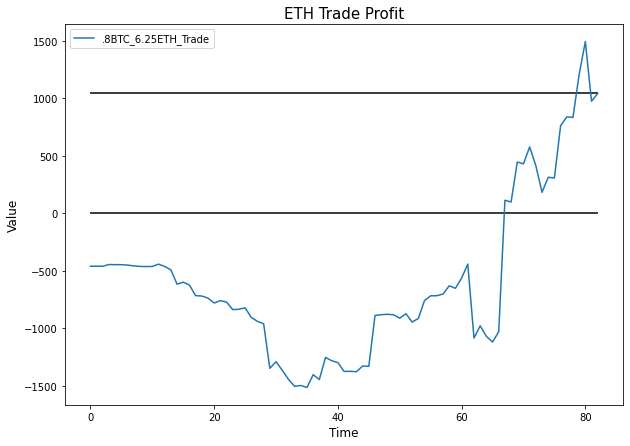

In [2]:
plt.rcParams['figure.figsize'] = [10, 7]
df[['.8BTC_6.25ETH_Trade']].plot()
plt.title('ETH Trade Profit',fontsize=15)
plt.xlabel('Time',fontsize=12)
plt.ylabel('Value',fontsize=12)
plt.hlines(0,df.index[0],df.index[-1],color='k')
plt.hlines(df['.8BTC_6.25ETH_Trade'].values[-1],df.index[0],df.index[-1],color='k')

plt.show()

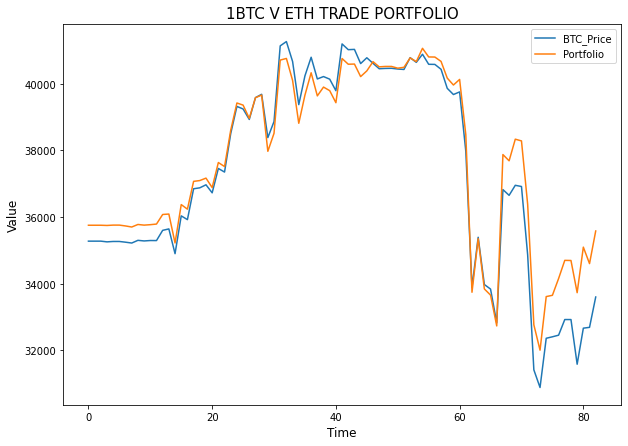

In [3]:
plt.rcParams['figure.figsize'] = [10, 7]
df[['BTC_Price','Portfolio']].plot()
plt.title('1BTC V ETH TRADE PORTFOLIO',fontsize=15)
plt.xlabel('Time',fontsize=12)
plt.ylabel('Value',fontsize=12)
plt.show()

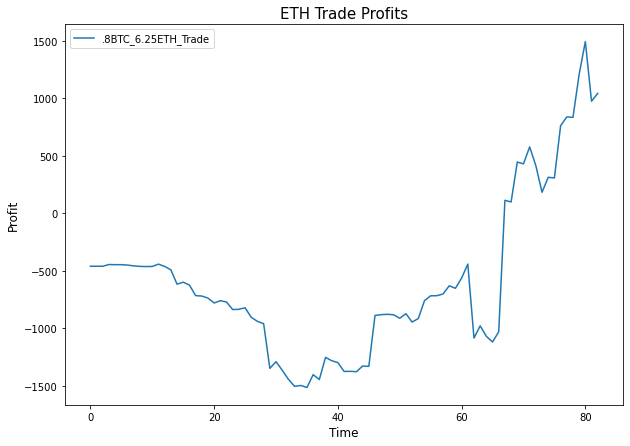

In [4]:
df[['.8BTC_6.25ETH_Trade']].plot()
plt.title('ETH Trade Profits',fontsize=15)
plt.ylabel('Profit',fontsize=12)
plt.xlabel('Time',fontsize=12)
plt.show()

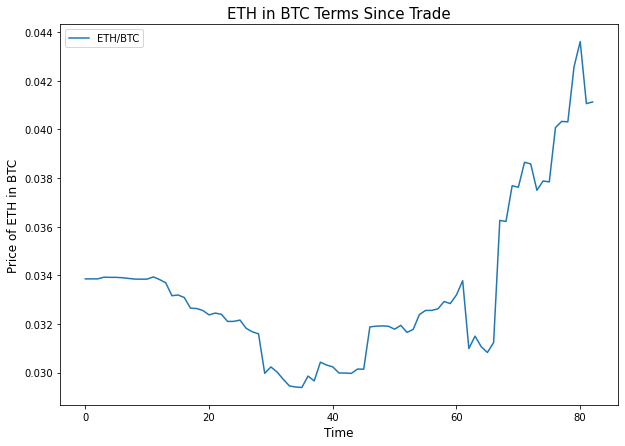

In [5]:
df[['ETH/BTC']].plot()
plt.title('ETH in BTC Terms Since Trade',fontsize=15)
plt.ylabel('Price of ETH in BTC',fontsize=12)
plt.xlabel('Time',fontsize=12)
plt.show()

In [6]:
#prepares coinpaprika api
import requests

from coinpaprika.exceptions import CoinpaprikaAPIException
from coinpaprika.exceptions import CoinpaprikaRequestException

class Client(object):
    API_URL = "https://api.coinpaprika.com/v1"

    def __init__(self, requests_params=None):
        self.session = self._init_session()
        self._requests_params = requests_params
    
    def _init_session(self):
        session = requests.session()
        session.headers.update({'Accept': 'application/json',
                                'User-Agent': 'coinpaprika/python'})
        return session

    def _request(self, method, uri, force_params=False, **kwargs):

        kwargs['timeout'] = 10

        data = kwargs.get('data', None)
        if data and isinstance(data, dict):
            kwargs['data'] = data

        # if get request assign data array to params value for requests lib
        if data and (method == 'get' or force_params):
            kwargs['params'] = kwargs['data']
            del(kwargs['data'])

        response = getattr(self.session, method)(uri, **kwargs)

        return self._handle_response(response)

    def _create_api_uri(self, path):
        return "{}/{}".format(self.API_URL, path)

    def _request_api(self, method, path, **kwargs):
        uri = self._create_api_uri(path)
        return self._request(method, uri, **kwargs)

    def _handle_response(self, response):
        if not str(response.status_code).startswith('2'):
            raise CoinpaprikaAPIException(response)
        try:
            return response.json()
        except ValueError:
            raise CoinpaprikaRequestException("Invalid Response: {}".format(response.text))

    def _get(self, path, **kwargs):
        return self._request_api('get', path, **kwargs)

    def global_market(self):
        return self._get("global")

    def coins(self):
        return self._get("coins")

    def coin(self, coin_id):
        return self._get("coins/{}".format(coin_id))

    def twitter(self, coin_id):
        return self._get("coins/{}/twitter".format(coin_id))

    def events(self, coin_id):
        return self._get("coins/{}/events".format(coin_id))

    def exchanges(self, coin_id):
        return self._get("coins/{}/exchanges".format(coin_id))

    def markets(self, coin_id, **params):
        return self._get("coins/{}/markets".format(coin_id), data=params)

    def candle(self, coin_id, **params):
        return self._get("coins/{}/ohlcv/latest".format(coin_id), data=params)

    def candles(self, coin_id, **params):
        return self._get("coins/{}/ohlcv/historical".format(coin_id), data=params)

    def today(self, coin_id, **params):
        return self._get("coins/{}/ohlcv/today".format(coin_id), data=params)

    def people(self, person_id):
        return self._get("people/{}".format(person_id))

    def tags(self, **params):
        return self._get("tags", data=params)

    def tag(self, tag_id, **params):
        return self._get("tags/{}".format(tag_id), data=params)

    def tickers(self, **params):
        return self._get("tickers", data=params)

    def ticker(self, coin_id, **params):
        return self._get("tickers/{}".format(coin_id), data=params)

    def historical(self, coin_id, **params):
        return self._get("tickers/{}/historical".format(coin_id), data=params)

    def exchange_list(self, **params):
        return self._get("exchanges", data=params)

    def exchange(self, exchange_id, **params):
        return self._get("exchanges/{}".format(exchange_id), data=params)

    def exchange_markets(self, exchange_id, **params):
        return self._get("exchanges/{}/markets".format(exchange_id), data=params)

    def search(self, **params):
        return self._get("search", data=params)

    def price_converter(self, **params):
        return self._get("price-converter", data=params)
from coinpaprika import client as Coinpaprika
client = Coinpaprika.Client()
from datetime import date

In [7]:
#obtains ether price and market cap
df_list=[]
for year in [2016,2017,2018,2019,2020,2021]:
    url='https://api.coinpaprika.com/v1/coins/eth-ethereum/ohlcv/historical?start='+str(year)+'-01-01&end='+str(date.today())
    df=pd.read_json(url)
    df_list.append(df)
dfethhistory=pd.concat(df_list)
dfethhistory['time_open']=pd.to_datetime(dfethhistory['time_open']).dt.date
dfethhistory['time_open']=pd.to_datetime(dfethhistory['time_open'])
dfethhistory.columns=['Date', 'time_close', 'open', 'high', 'low', 'close', 'volume','market_cap_eth']
dfethhistory=dfethhistory.set_index('Date')
dfethhistory['price_eth']=(dfethhistory['open']+dfethhistory['close'])/2
dfethhistory=dfethhistory[['price_eth','market_cap_eth']]

In [8]:
#obtains bitcoin price and market cap
df_list=[]
for year in [2016,2017,2018,2019,2020,2021]:
    url='https://api.coinpaprika.com/v1/coins/btc-bitcoin/ohlcv/historical?start='+str(year)+'-01-01&end='+str(date.today())
    df=pd.read_json(url)
    df_list.append(df)
dfbtchistory=pd.concat(df_list)
dfbtchistory['time_open']=pd.to_datetime(dfbtchistory['time_open']).dt.date
dfbtchistory['time_open']=pd.to_datetime(dfbtchistory['time_open'])
dfbtchistory.columns=['Date', 'time_close', 'open', 'high', 'low', 'close', 'volume','market_cap_btc']
dfbtchistory=dfbtchistory.set_index('Date')
dfbtchistory['price_btc']=(dfbtchistory['open']+dfbtchistory['close'])/2
dfbtchistory=dfbtchistory[['price_btc','market_cap_btc']]

In [9]:
#obtains bitcoin supply
api_key=''
url='https://www.quandl.com/api/v3/datasets/BCHAIN/TOTBC.csv?api_key='+api_key
dfbitsupply=pd.read_csv(url).loc[::-1].set_index('Date')
dfbitsupply.columns=['btc_supply']

In [10]:
df=dfethhistory.join(dfbtchistory,how='left').join(dfbitsupply,how='left')
df['eth_cap/btc_supply']=df['market_cap_eth']/df['btc_supply']

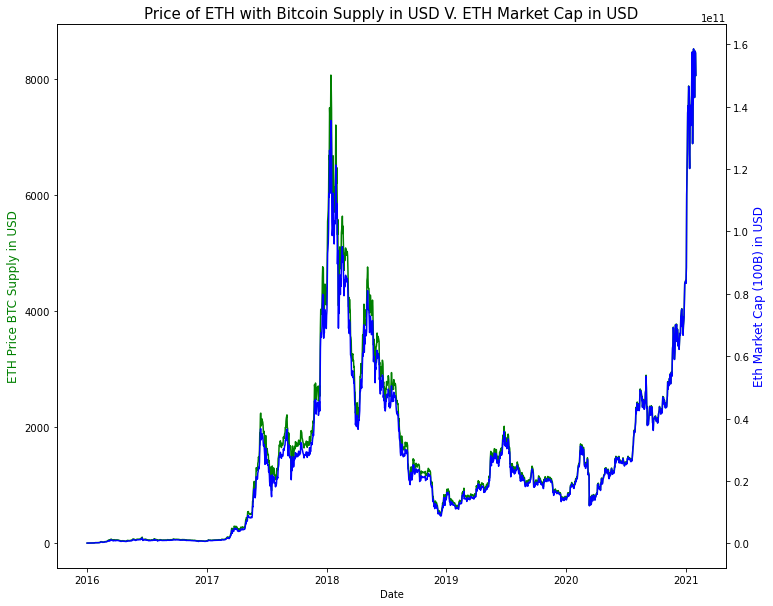

In [11]:
plt.rcParams['figure.figsize'] = [12, 10]
import matplotlib.pyplot as plt
x = dfethhistory.index
y1 = df['eth_cap/btc_supply']
y2 = df['market_cap_eth']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('ETH Price BTC Supply in USD', color='g',fontsize=12)
ax2.set_ylabel('Eth Market Cap (100B) in USD', color='b',fontsize=12)
plt.title('Price of ETH with Bitcoin Supply in USD V. ETH Market Cap in USD', fontsize=15)
plt.show()

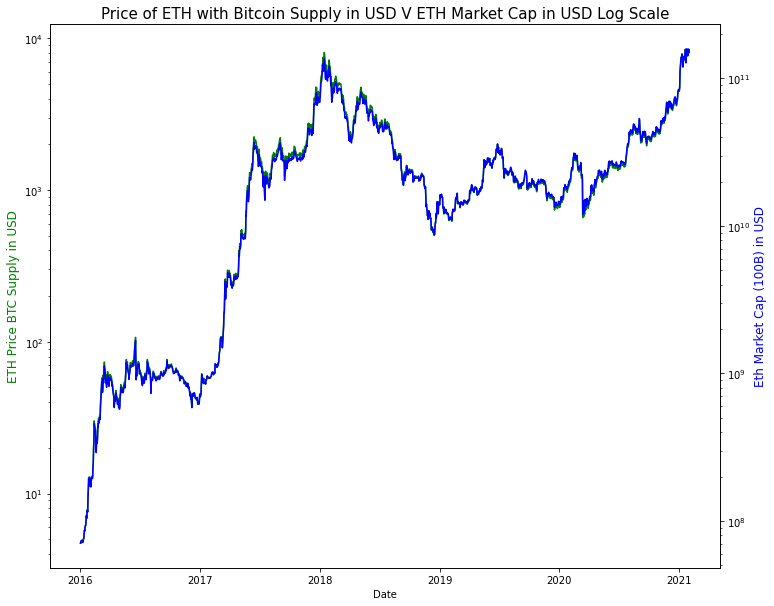

In [12]:
plt.rcParams['figure.figsize'] = [12, 10]
import matplotlib.pyplot as plt
x = dfethhistory.index
y1 = df['eth_cap/btc_supply']
y2 = df['market_cap_eth']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('ETH Price BTC Supply in USD', color='g',fontsize=12)
ax1.set_yscale("log")
ax2.set_ylabel('Eth Market Cap (100B) in USD', color='b',fontsize=12)
ax2.set_yscale("log")
plt.title('Price of ETH with Bitcoin Supply in USD V ETH Market Cap in USD Log Scale', fontsize=15)
plt.show()

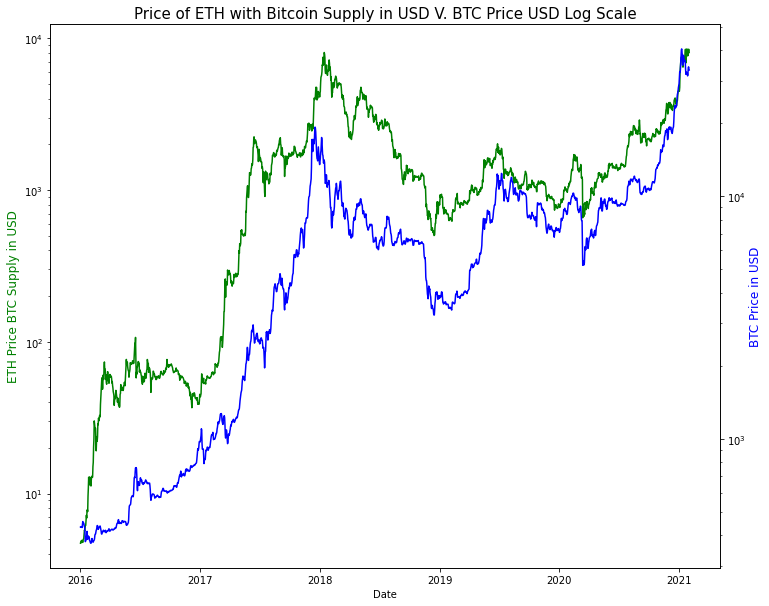

In [13]:
plt.rcParams['figure.figsize'] = [12, 10]
import matplotlib.pyplot as plt
x = dfethhistory.index
y1 = df['eth_cap/btc_supply']
y2 = df['price_btc']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('ETH Price BTC Supply in USD', color='g',fontsize=12)
ax1.set_yscale("log")
ax2.set_ylabel('BTC Price in USD', color='b',fontsize=12)
ax2.set_yscale('log')
plt.title('Price of ETH with Bitcoin Supply in USD V. BTC Price USD Log Scale',fontsize=15)
plt.show()

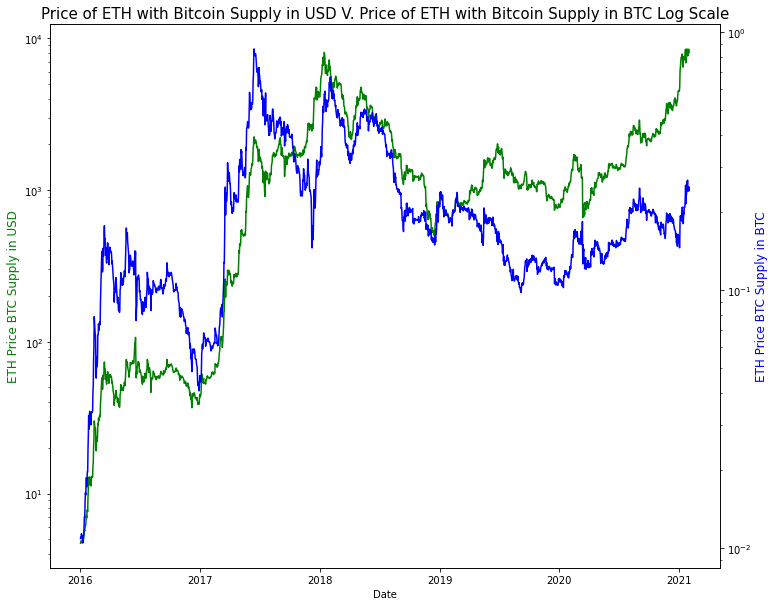

In [14]:
df['eth_BTC_supply_in_BTC']=df['eth_cap/btc_supply']/df['price_btc']
plt.rcParams['figure.figsize'] = [12, 10]
import matplotlib.pyplot as plt
x = dfethhistory.index
y1 = df['eth_cap/btc_supply']
y2 = df['eth_BTC_supply_in_BTC']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('ETH Price BTC Supply in USD', color='g',fontsize=12)
ax1.set_yscale("log")
ax2.set_ylabel('ETH Price BTC Supply in BTC', color='b',fontsize=12)
ax2.set_yscale('log')
plt.title('Price of ETH with Bitcoin Supply in USD V. Price of ETH with Bitcoin Supply in BTC Log Scale',fontsize=15)
plt.show()

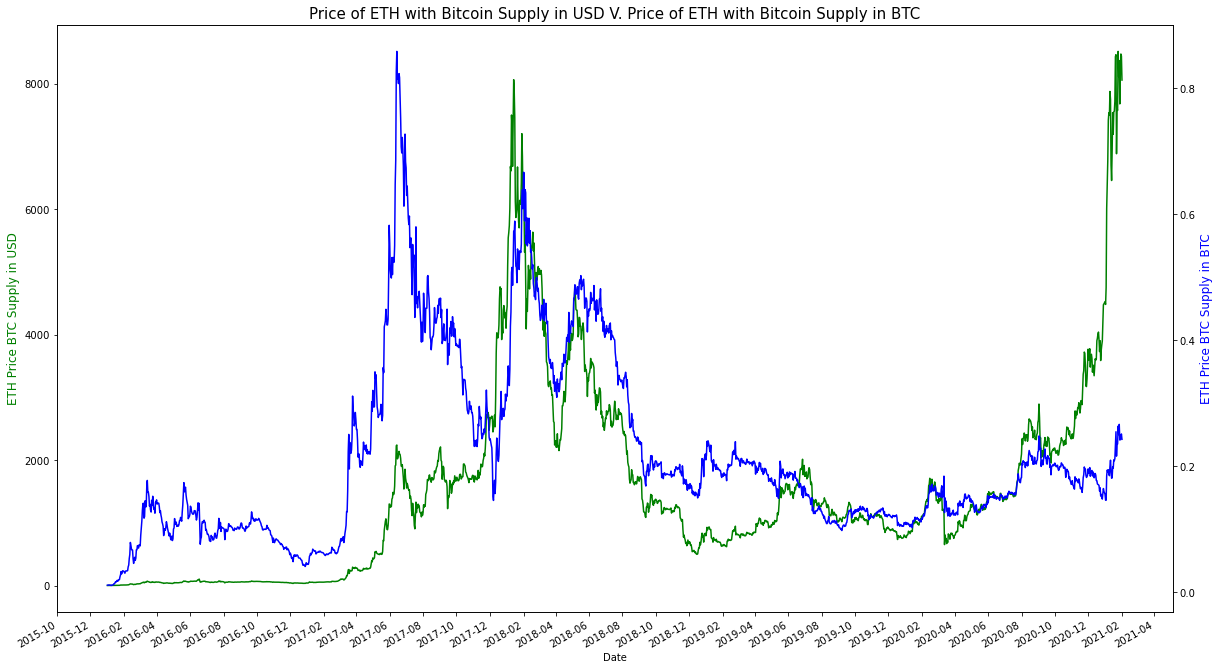

In [15]:
df['eth_BTC_supply_in_BTC']=df['eth_cap/btc_supply']/df['price_btc']
plt.rcParams['figure.figsize'] = [20, 12]
import matplotlib.pyplot as plt
x = dfethhistory.index
y1 = df['eth_cap/btc_supply']
y2 = df['eth_BTC_supply_in_BTC']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('ETH Price BTC Supply in USD', color='g',fontsize=12)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
fig.autofmt_xdate()
#ax1.set_yscale("log")
#yticks=[1000,10000,15000,20000,25000,30000]
#plt.yticks(yticks,fontsize=12)
#ax.set_yticklabels(yticks)
ax2.set_ylabel('ETH Price BTC Supply in BTC', color='b',fontsize=12)
#ax2.set_yscale('log')
plt.title('Price of ETH with Bitcoin Supply in USD V. Price of ETH with Bitcoin Supply in BTC',fontsize=15)
plt.show()

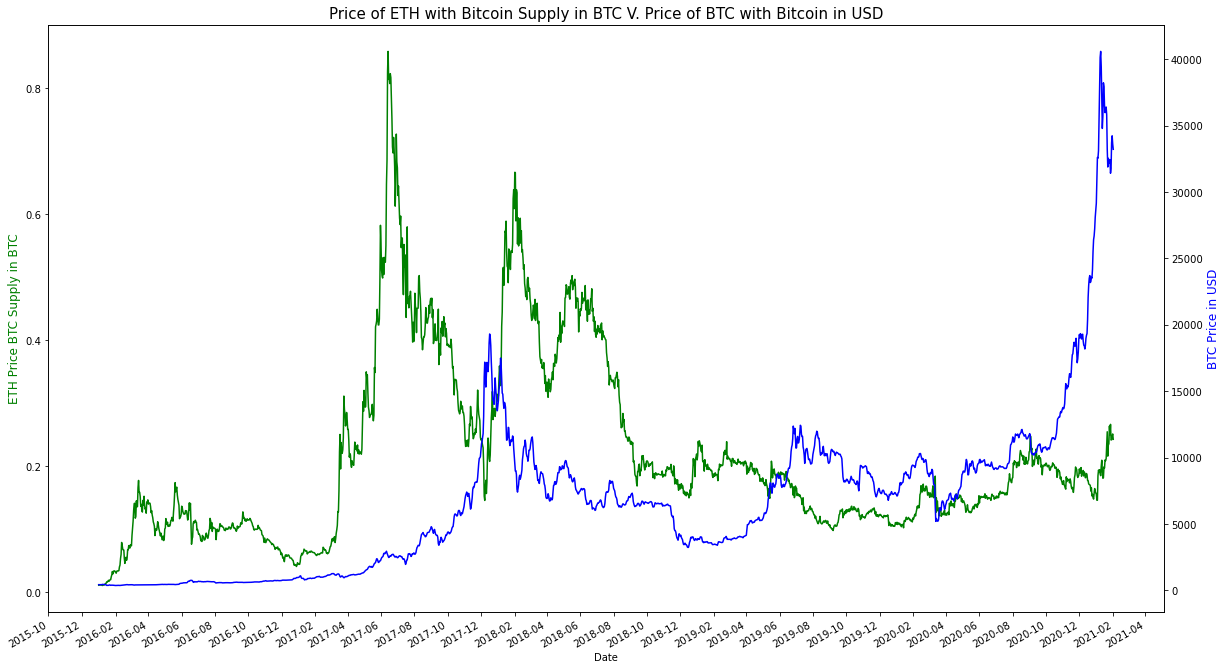

In [16]:
df['eth_BTC_supply_in_BTC']=df['eth_cap/btc_supply']/df['price_btc']
plt.rcParams['figure.figsize'] = [20, 12]
import matplotlib.pyplot as plt
x = dfethhistory.index
y1 = df['eth_BTC_supply_in_BTC']
y2 = df['price_btc']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('ETH Price BTC Supply in BTC', color='g',fontsize=12)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
fig.autofmt_xdate()
#ax1.set_yscale("log")
#yticks=[1000,10000,15000,20000,25000,30000]
#plt.yticks(yticks,fontsize=12)
#ax.set_yticklabels(yticks)
ax2.set_ylabel('BTC Price in USD', color='b',fontsize=12)
#ax2.set_yscale('log')
plt.title('Price of ETH with Bitcoin Supply in BTC V. Price of BTC with Bitcoin in USD',fontsize=15)
plt.show()

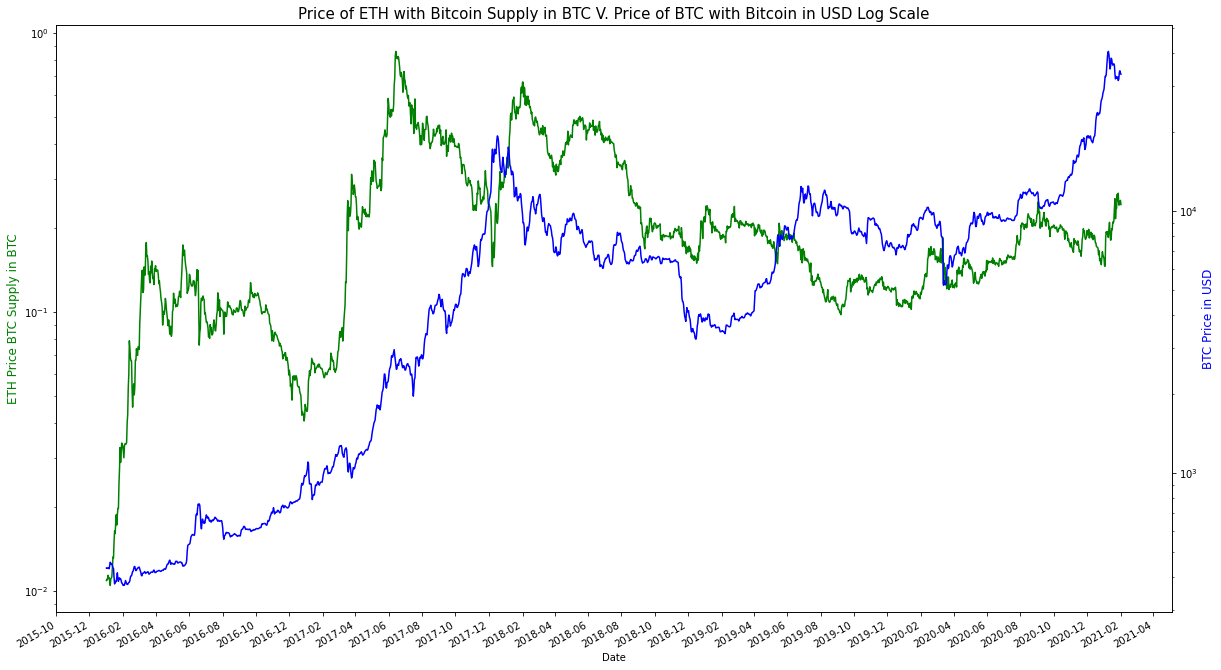

In [17]:
df['eth_BTC_supply_in_BTC']=df['eth_cap/btc_supply']/df['price_btc']
plt.rcParams['figure.figsize'] = [20, 12]
import matplotlib.pyplot as plt
x = dfethhistory.index
y1 = df['eth_BTC_supply_in_BTC']
y2 = df['price_btc']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('ETH Price BTC Supply in BTC', color='g',fontsize=12)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
fig.autofmt_xdate()
ax1.set_yscale("log")
#yticks=[1000,10000,15000,20000,25000,30000]
#plt.yticks(yticks,fontsize=12)
#ax.set_yticklabels(yticks)
ax2.set_ylabel('BTC Price in USD', color='b',fontsize=12)
ax2.set_yscale('log')
plt.title('Price of ETH with Bitcoin Supply in BTC V. Price of BTC with Bitcoin in USD Log Scale',fontsize=15)
plt.show()